In [6]:
#Librerias
import pandas as pd
import numpy as np
import cobra
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.interpolate import interp1d
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import requests
import time

from scipy.stats import mannwhitneyu 

/tmp/ipykernel_138895/2159061748.py:11: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [7]:
#Cargar archivos con pandas
fpkm=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/KuangRNAseq_fpkm", sep="\t",index_col=0)
atac=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/GSE101290_normalized_atac_counts.csv",index_col=0)
OX= pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/kuangOX.txt", sep="\t")
RB= pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/kuangRB.txt", sep="\t")
RC= pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/kuangRC.txt", sep="\t")
SAM=pd.read_csv("/home/bguzman/jupyter/UI/YMC/GeneExpression/vectorME.csv", index_col=0)
ACOA=pd.read_csv("/home/bguzman/jupyter/UI/YMC/GeneExpression/vectorAC.csv")
SAM_glc=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorME_glc.csv",index_col=0)
ACOA_glc=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorAC_glc.csv",index_col=0)
SAM_all=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorME_allflux.csv",index_col=0)
ACOA_all=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorAC_allflux.csv",index_col=0)
H3K9ac=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/dfi_T_all_ac.csv", index_col=0)
H3K4me3=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/dfi_T_all.csv", index_col=0)

time=[48.32,48.63,48.75,48.83,48.98,49.15,49.32,49.48,49.65,49.82,49.98,50.16,50.33,50.87,51.4,51.95]


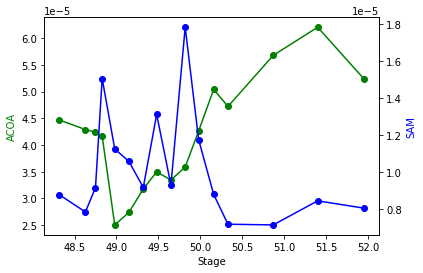

In [8]:
time_circle=np.concatenate((time,np.array(time)+(52-48)))
acoa_circle=np.concatenate((np.array(ACOA_all)[0],np.array(ACOA_all)[0]))
sam_circle=np.concatenate((np.array(SAM_all)[0],np.array(SAM_all)[0]))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(time,np.array(ACOA_all)[0], 'go-')
ax2.plot(time,np.array(SAM_all)[0], 'bo-')

ax1.set_xlabel('Stage')
ax1.set_ylabel('ACOA', color='g')
ax2.set_ylabel('SAM', color='b')

plt.savefig("Fig2A.pdf")
#from scipy.ndimage import uniform_filter1d
#
#y_smooth = uniform_filter1d(np.array(SAM_all)[0],size=3,mode="wrap")
#SAM_all.iloc[0,:]=y_smooth 
#ax2.plot(time,y_smooth, 'b-')
#
#y_smooth = uniform_filter1d(np.array(ACOA_all)[0],size=3,mode="wrap")
#ACOA_all.iloc[0,:]=y_smooth 
#ax1.plot(time,y_smooth, 'g-')

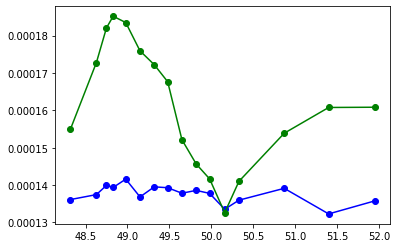

In [9]:
plt.plot(time,H3K4me3.mean(axis=0)/4e6,"bo-")
#plt.plot(time,H3K4me3.quantile(0.75,axis=0),"bo--")
#plt.plot(time,H3K4me3.quantile(0.25,axis=0),"bo--")
plt.plot(time,H3K9ac.mean(axis=0)/4e6,"go-")
#plt.plot(time,H3K9ac.quantile(0.75,axis=0),"go--")
#plt.plot(time,H3K9ac.quantile(0.25,axis=0),"go--")

In [10]:
time_circle

array([48.32, 48.63, 48.75, 48.83, 48.98, 49.15, 49.32, 49.48, 49.65,
       49.82, 49.98, 50.16, 50.33, 50.87, 51.4 , 51.95, 52.32, 52.63,
       52.75, 52.83, 52.98, 53.15, 53.32, 53.48, 53.65, 53.82, 53.98,
       54.16, 54.33, 54.87, 55.4 , 55.95])

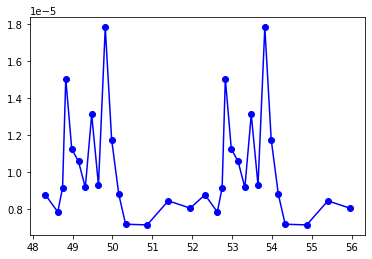

In [11]:
plt.plot(time_circle,sam_circle,'bo-')
plt.show()

In [12]:
#Separar las listas de cada etapa
#Dejar solo las columnas de RNA-seq y excluir las de microarrays
df_fpkm=fpkm.iloc[0:-2,-16::] 

In [13]:
#Sacar promedio entre los diferentes elementos de los replicados 1, 2; 3, 4; 5 , 6.
genes=atac.index
T1=list((atac.iloc[: , 1].values+atac.iloc[: , 2].values)/2)
T2=list((atac.iloc[: , 3].values+atac.iloc[: , 4].values)/2)
T3=list((atac.iloc[: , 5].values+atac.iloc[: , 6].values)/2)
T4=list((atac.iloc[: , 7].values+atac.iloc[: , 8].values)/2)
T5=list((atac.iloc[: , 9].values+atac.iloc[: , 10].values)/2)
T6=list((atac.iloc[: , 11].values+atac.iloc[: , 12].values)/2)

In [14]:
#Hacer df apartir de las listas realizadas con los promedios de los replicados
import pandas as pd
import numpy as np
lst1 = genes
#lst2 = T1
#lst3= T2
#lst4= T3
#lst5= T4
#lst6= T5
#lst7= T6
lst2 = T2 # RC
lst3= T3  # OX
lst4= T4  # OX
lst5= T5  # RB
lst6= T6  # RB
lst7= T1  # RC
atac_prom = pd.DataFrame(list(zip(lst1,lst2,lst3,lst4,lst5,lst6,lst7)), columns = ['Genes','T1','T2','T3','T4','T5','T6'])
#fijar como indice la columna de los gene.id para hacer el heatmap
df_atac = atac_prom.set_index(['Genes'])
#df_atac

In [15]:
#Definir listas con los genes por etapa 
lista_RC=list(RC.iloc[0:-2,0])
lista_OX=list(OX.iloc[0:-2,0])
lista_RB=list(RB.iloc[0:-2,0])

In [16]:
#Listas de etapas en atac-seq
list_1=lista_RC
list_2=atac.index
from collections import Counter
cnt1 = Counter(list_1)
cnt2 = Counter(list_2)
lista_RB_ss= [key for key, counts in cnt2.items() if cnt1[key] == counts]

list_3=lista_OX
list_4=atac.index
from collections import Counter
cnt3 = Counter(list_3)
cnt4 = Counter(list_4)
lista_OX_ss= [key for key, counts in cnt4.items() if cnt3[key] == counts]

list_5=lista_RB
list_6=atac.index
from collections import Counter
cnt5 = Counter(list_5)
cnt6 = Counter(list_6)
lista_RB_ss= [key for key, counts in cnt6.items() if cnt5[key] == counts]

In [17]:
lista_RC_ss=[]
for gene in lista_RC:
    if gene in atac.index:
          lista_RC_ss.append(gene)

lista_OX_ss=[]
for gene in lista_OX:
    if gene in atac.index:
          lista_OX_ss.append(gene)
            
lista_RB_ss=[]
for gene in lista_RB:
    if gene in atac.index:
          lista_RB_ss.append(gene)

In [18]:
from scipy import stats
   
#Cálculo de la correlacion entre el precursor y la marca
def ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa):
    # subsets the dataframe
    df = marcaEpigenetica.loc[genesEtapa]
    # Computes the correlation
    corr=[]
    for i in range(len(df)):
        a = np.array(df.iloc[i,:])
        b = np.array(perfilPrecursor)[0]
        corr.append(stats.pearsonr(a,b)[0])
    #ordenar corrlacion demayor a menor
    df_corr=pd.DataFrame(corr,index =df.index,columns = ['correlation'])
    corr_sort = df_corr.sort_values('correlation',ascending=False)

    return(corr_sort)


In [19]:
# Function to sort genes
    
#Cálculo de la correlacion entre el precursor y la marca
def ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa):
    # subsets the dataframe
    df = marcaEpigenetica.loc[genesEtapa]
    # Computes the correlation
    corr=[]
    for i in range(len(df)):
        a = np.array(df.iloc[i,:])
        b = np.array(perfilPrecursor)[0]
        corr.append(stats.pearsonr(a,b)[0])
    #ordenar corrlacion demayor a menor
    df_corr=pd.DataFrame(corr,index =df.index,columns = ['correlation'])
    corr_sort = df_corr.sort_values('correlation',ascending=False)

    return(corr_sort)

T1


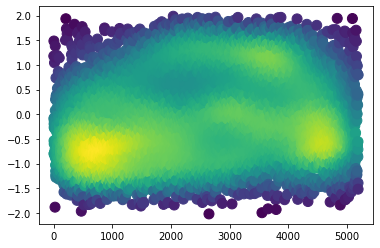

T2


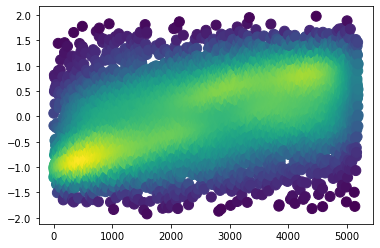

T3


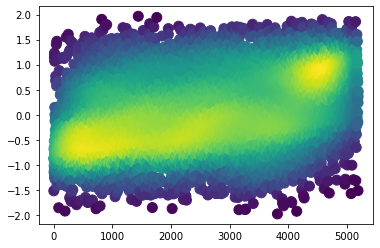

T4


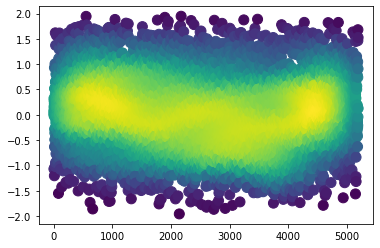

T5


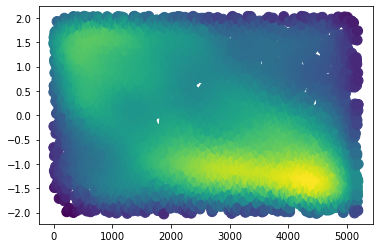

T6


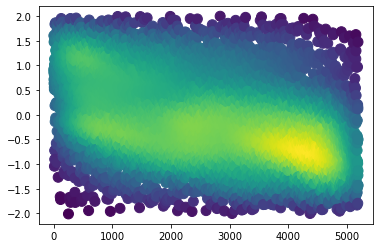

In [20]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA_all

timeT=[]
for i in range(1,7):
    timeT.append("T"+str(i))

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


for time in timeT:
    print(time)
    # Generate data
    x = range(dfx[time].size)
    y = dfx[time]

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, s=100)
    plt.show()

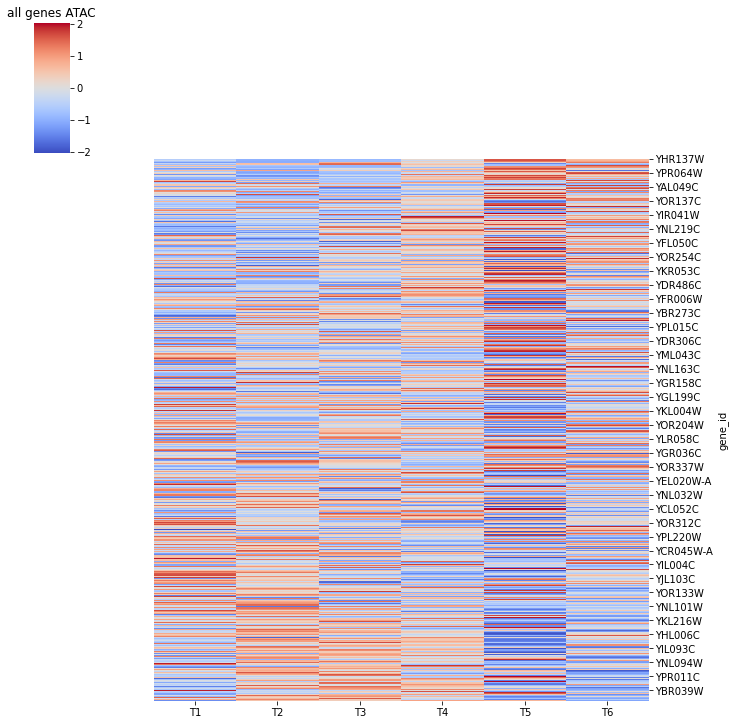

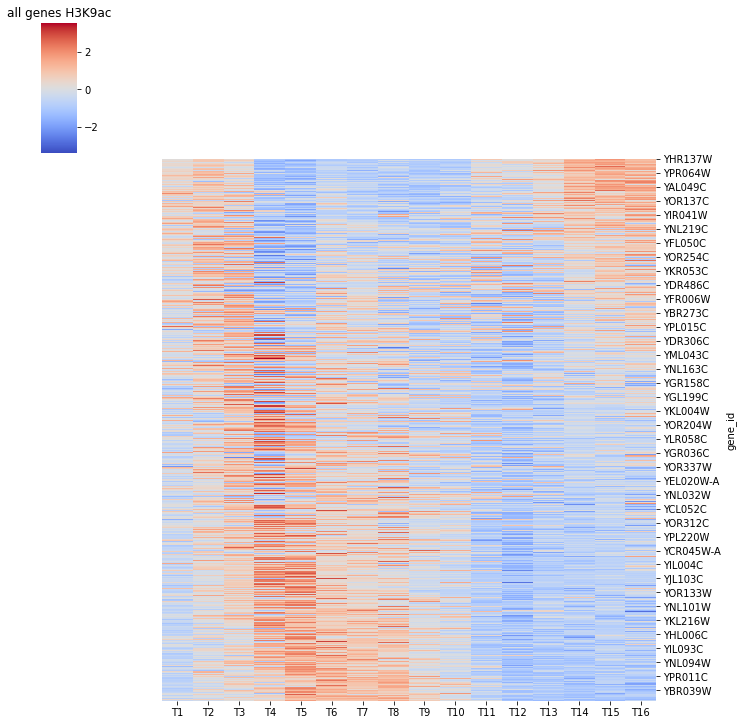

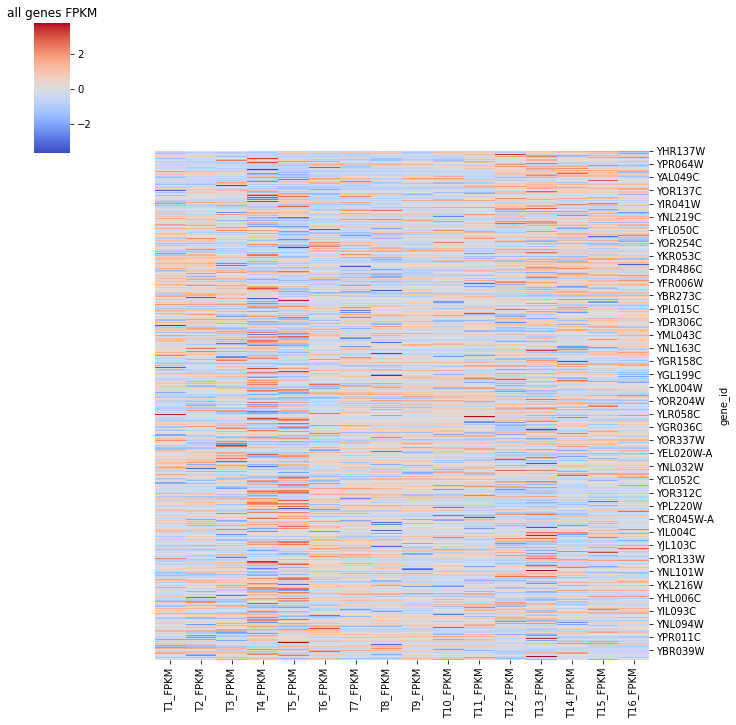

In [21]:
#H3K9Ac, all genes
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA_all

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

#ATAC
ACOA_atac=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(ACOA_atac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)
plt.title("all genes ATAC")
plt.savefig("allGenes_ACOA_atac.pdf")
#H3K9Ac
ACOA_H3K9ac=H3K9ac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(ACOA_H3K9ac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)
plt.title("all genes H3K9ac")    
plt.savefig("allGenes__ACOA_H3K9ac.pdf")
#FPKM
ACOA_fpkm=fpkm.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(ACOA_fpkm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)
plt.title("all genes FPKM")
plt.savefig("allGenes__fpkm_ac.pdf")

RC

OX

RB



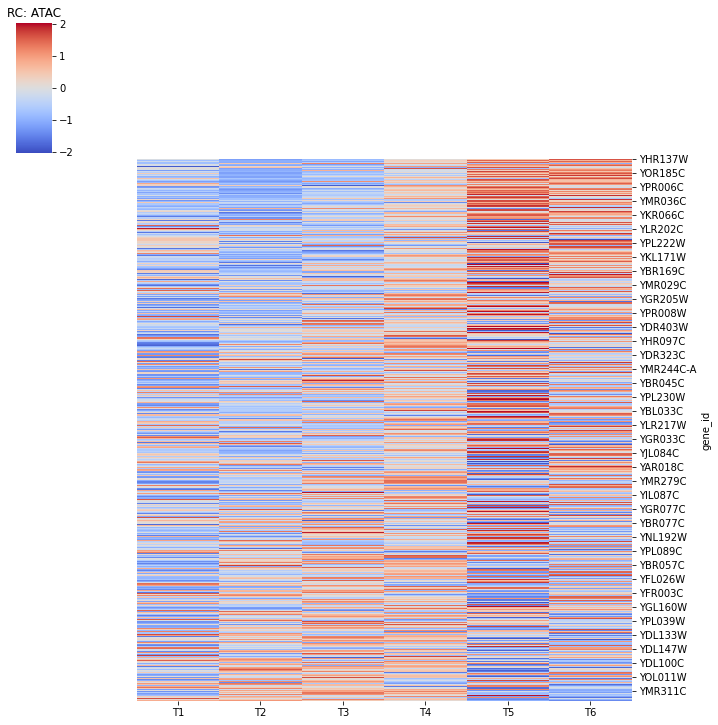

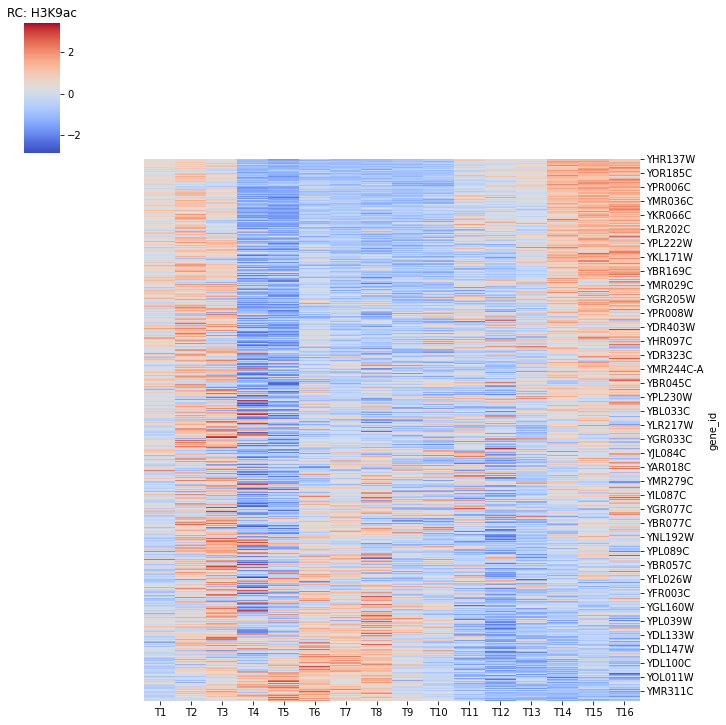

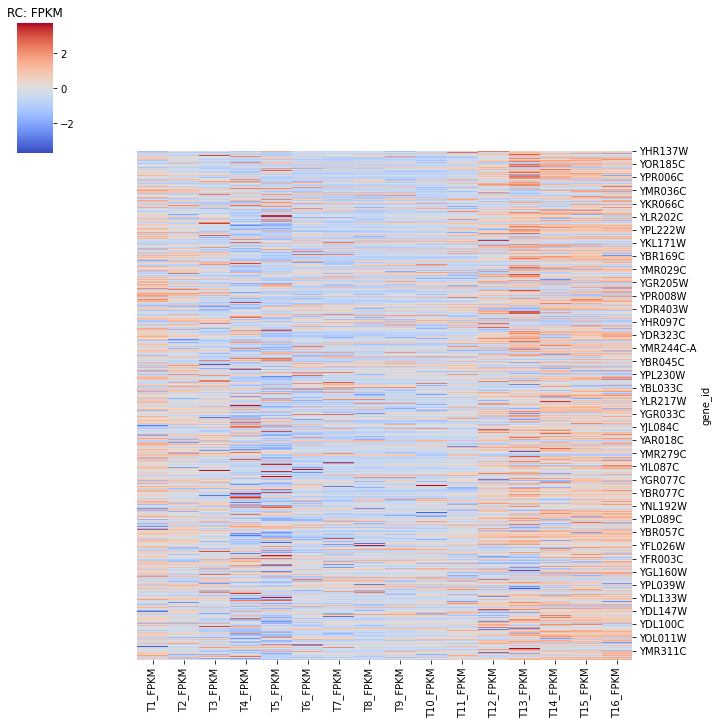

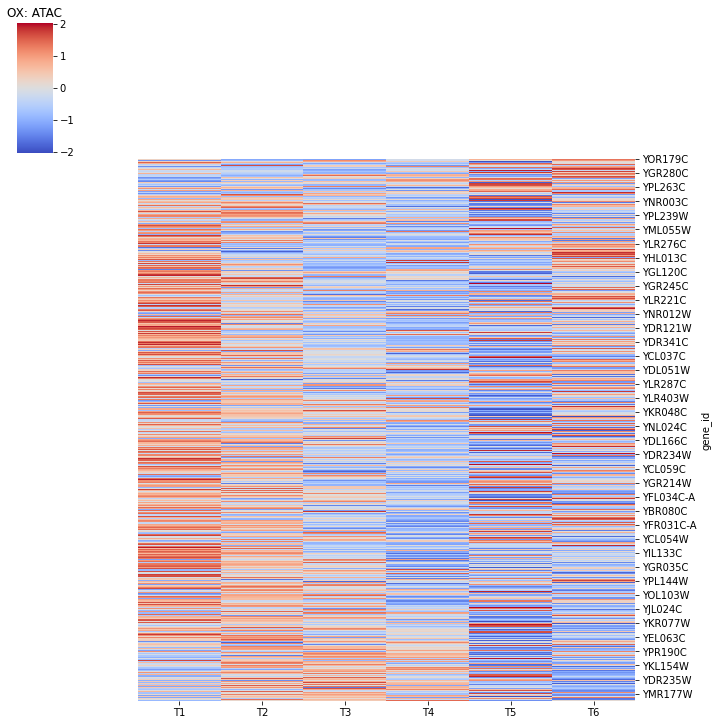

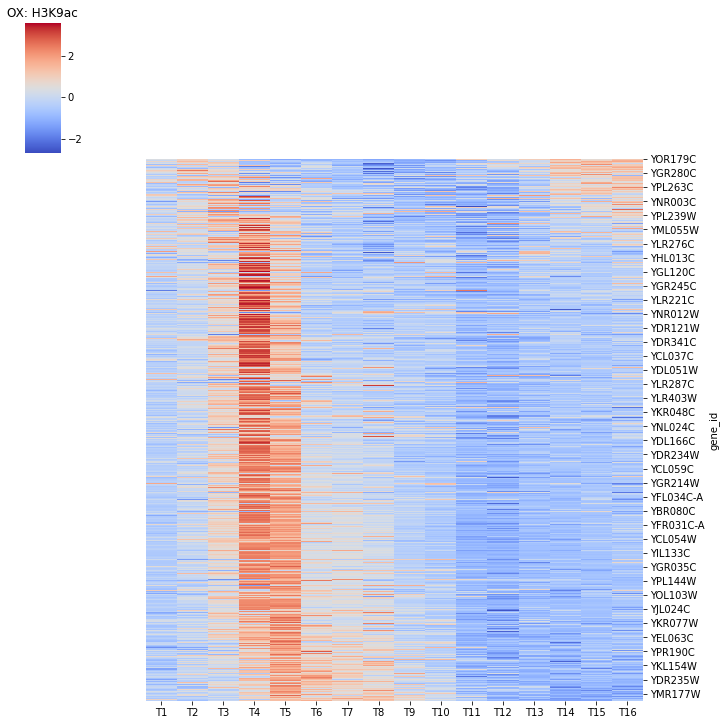

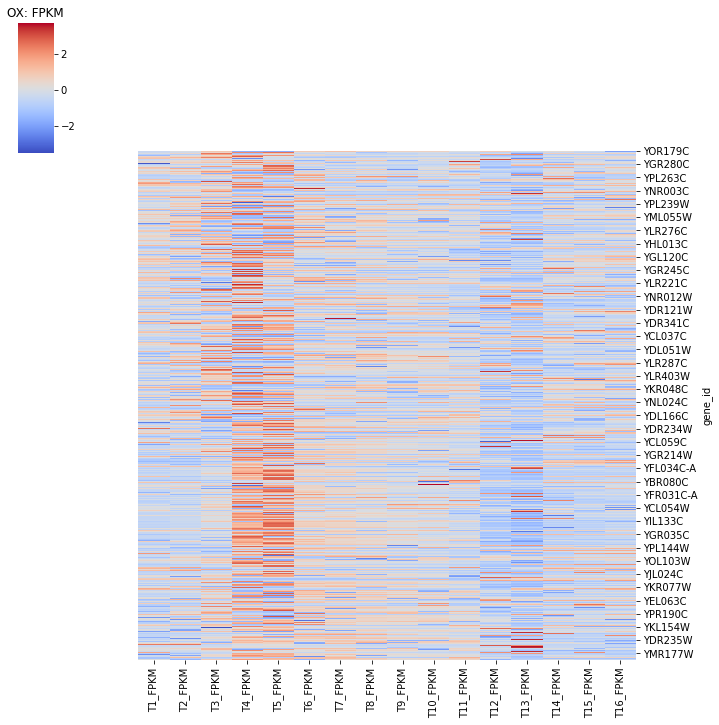

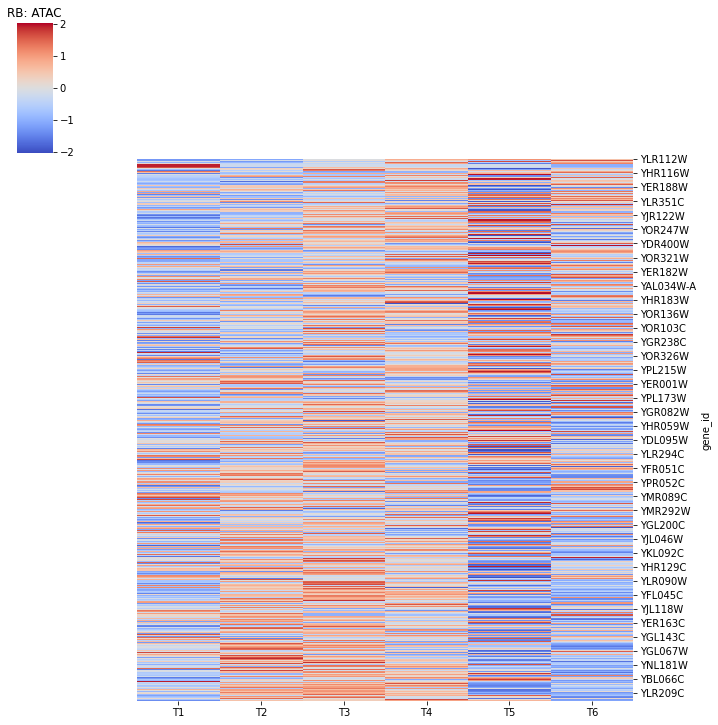

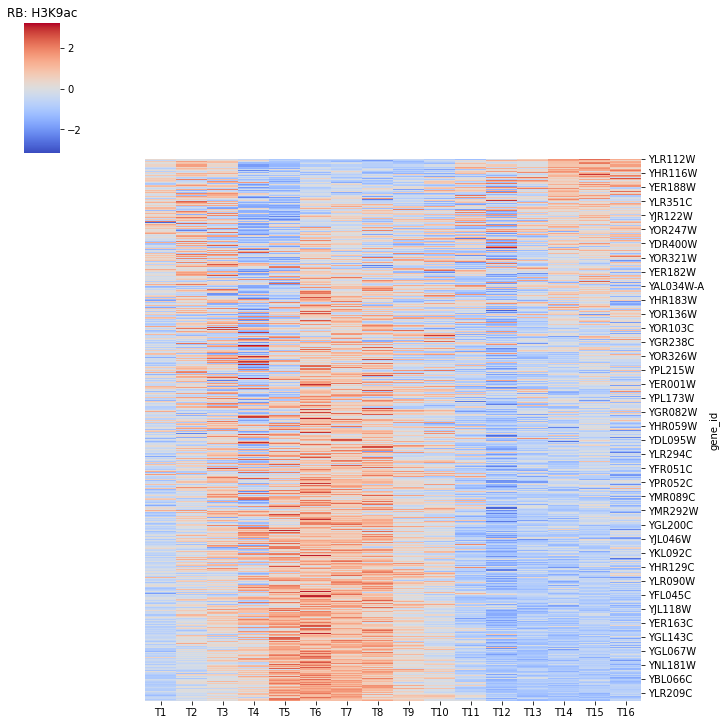

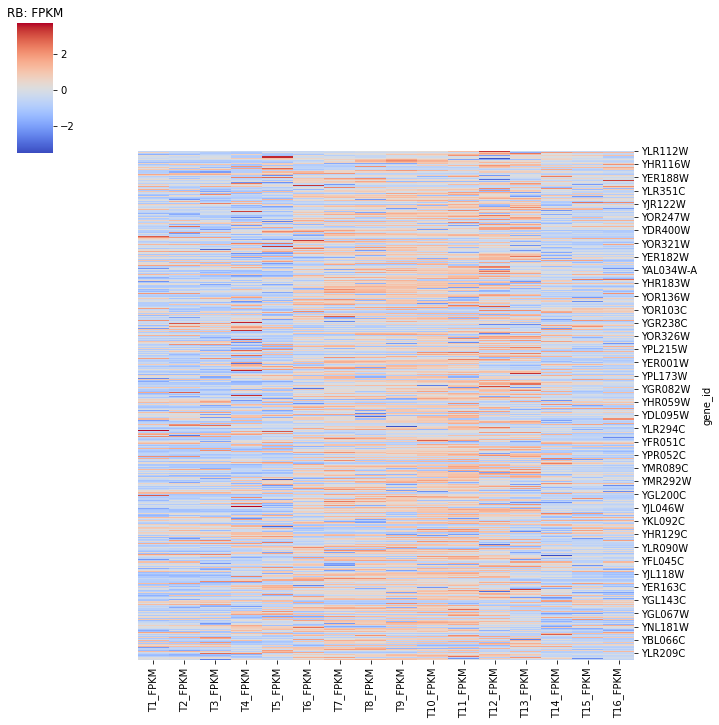

In [22]:
#H3K9Ac
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA_all

for etapa in ["RC","OX","RB"]:
    print(etapa)
    print("=====================================================================\n")
    genesEtapa = {"RC":lista_RC_ss,"OX":lista_OX_ss,"RB":lista_RB_ss}[etapa]
    genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

    #ATAC
    ACOA_atac=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(ACOA_atac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": ATAC")
    plt.savefig(etapa+"_ACOA_atac.pdf")
    #H3K9Ac
    ACOA_H3K9ac=H3K9ac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(ACOA_H3K9ac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": H3K9ac")    
    plt.savefig(etapa+"_ACOA_H3K9ac.pdf")
    #FPKM
    ACOA_fpkm=fpkm.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(ACOA_fpkm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": FPKM")
    plt.savefig(etapa+"_fpkm_ac.pdf")

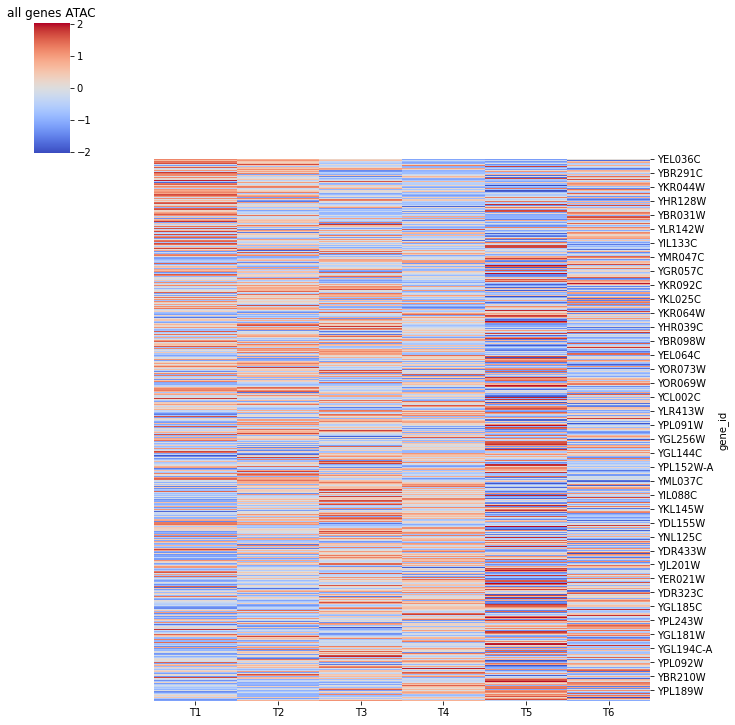

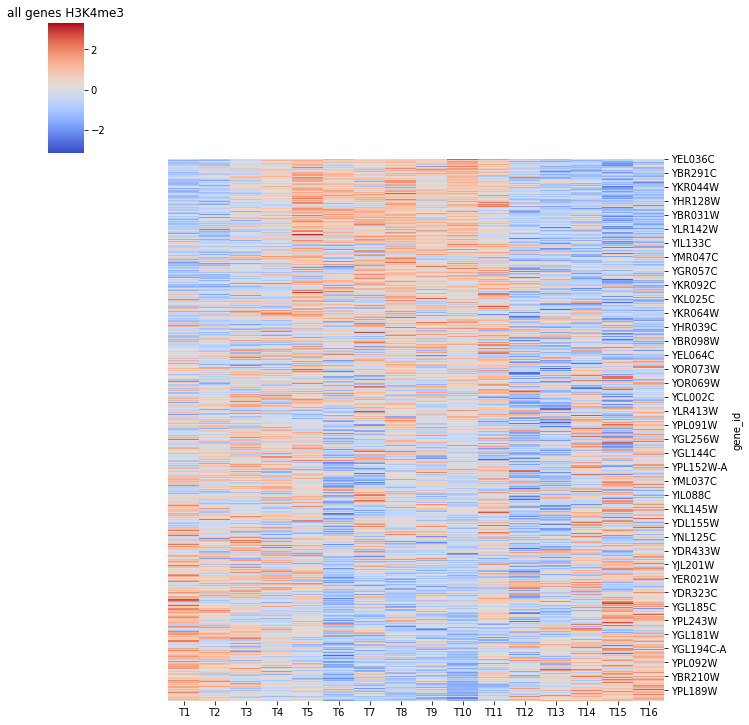

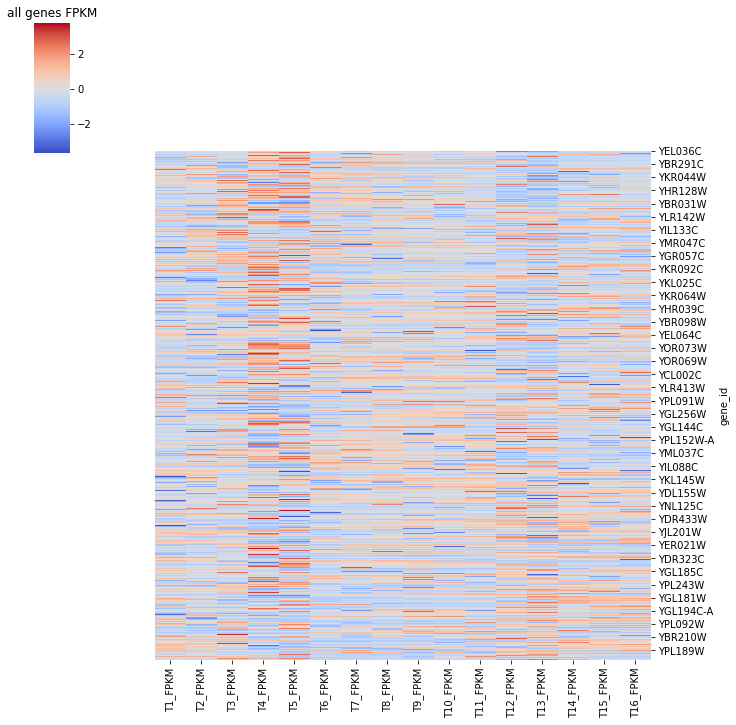

In [23]:
#H3K4me3 all genes
marcaEpigenetica= H3K4me3
perfilPrecursor= SAM_all

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

#ATAC
SAM_atac=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(SAM_atac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, 
row_cluster=False)
plt.title("all genes ATAC")
plt.savefig("allGenes_SAM_atac.pdf")
#H3K9Ac
SAM_H3K4me3=H3K4me3.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(SAM_H3K4me3, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, 
row_cluster=False)
plt.title("all genes H3K4me3")    
plt.savefig("allGenes_SAM_H3K4me3.pdf")
#FPKM
SAM_fpkm=fpkm.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(SAM_fpkm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, 
row_cluster=False)
plt.title("all genes FPKM")
plt.savefig("allGenes_SAM_fpkm.pdf")

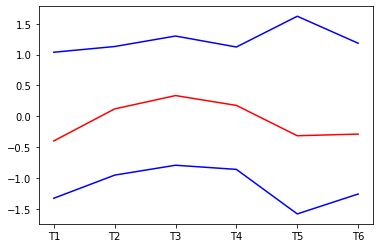

In [24]:
plt.plot(df_atac.loc[lista_RB_ss].apply(lambda x: (x-x.mean())/x.std(), axis = 1).quantile(0.5),"r")
plt.plot(df_atac.loc[lista_RB_ss].apply(lambda x: (x-x.mean())/x.std(), axis = 1).quantile(0.1),"b")
plt.plot(df_atac.loc[lista_RB_ss].apply(lambda x: (x-x.mean())/x.std(), axis = 1).quantile(0.9),"b")

T1


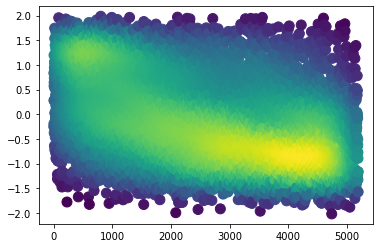

T2


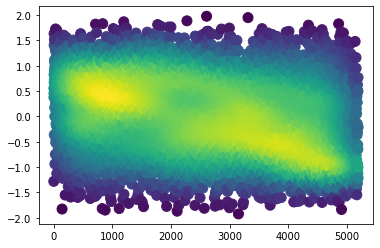

T3


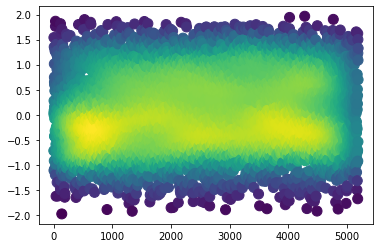

T4


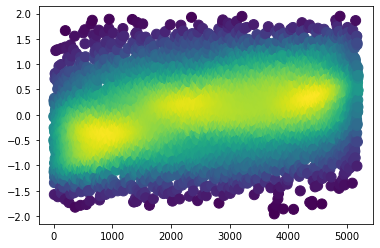

T5


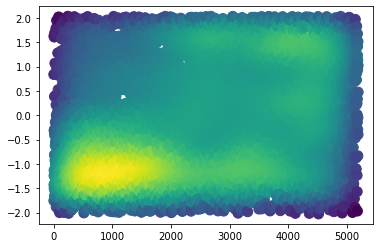

T6


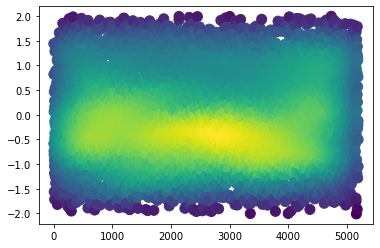

In [25]:
marcaEpigenetica= H3K4me3
perfilPrecursor= SAM_all

timeT=[]
for i in range(1,7):
    timeT.append("T"+str(i))
dfx[timeT]

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


for time in timeT:
    print(time)
    # Generate data
    x = range(dfx[time].size)
    y = dfx[time]

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, s=100)
    plt.show()

In [26]:
dfx[timeT].size

31158

RC

OX

RB



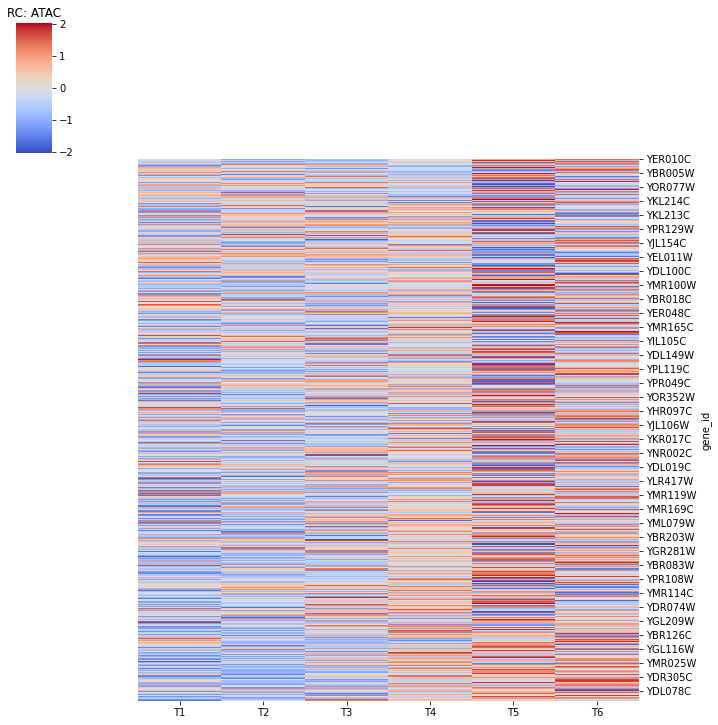

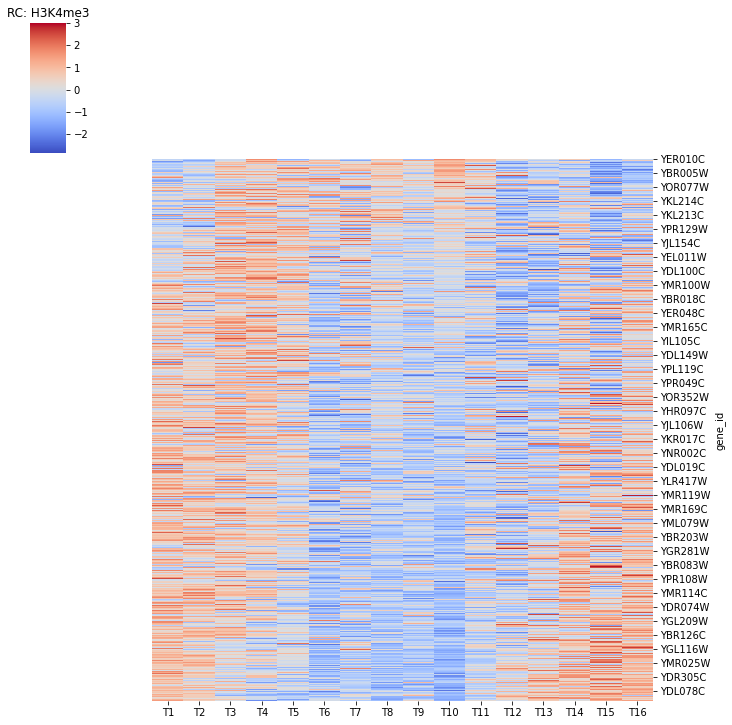

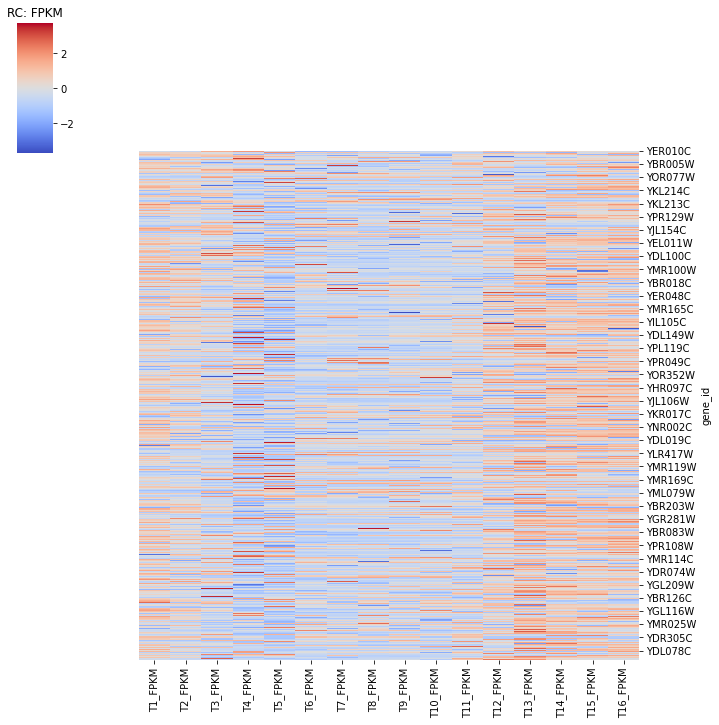

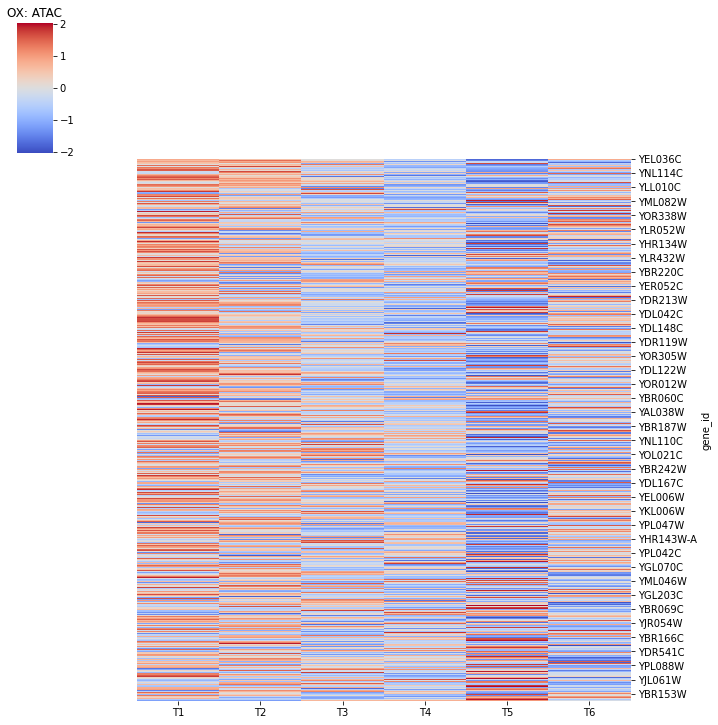

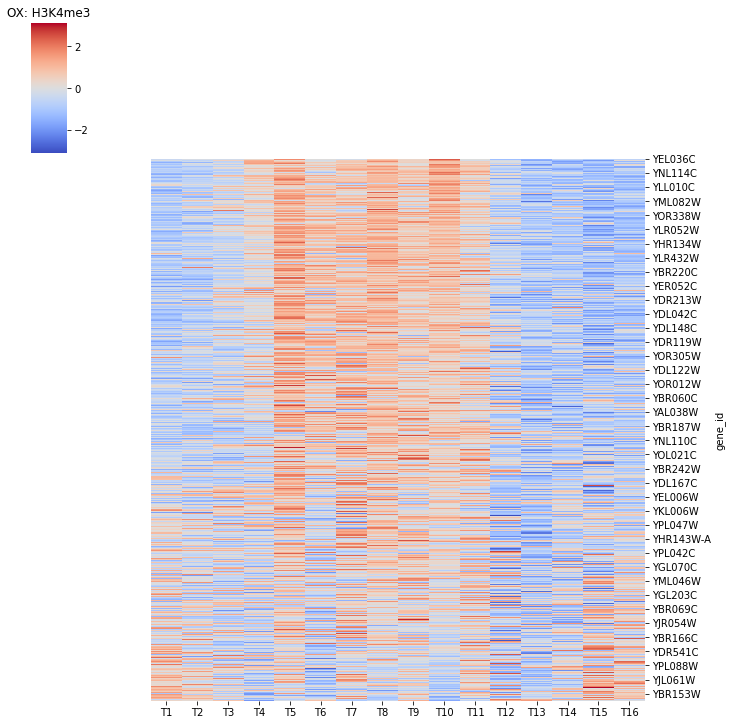

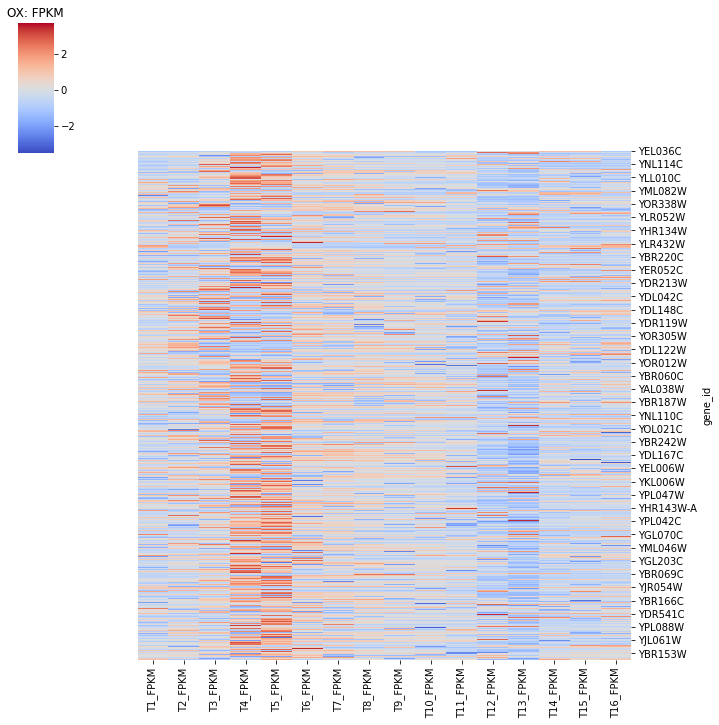

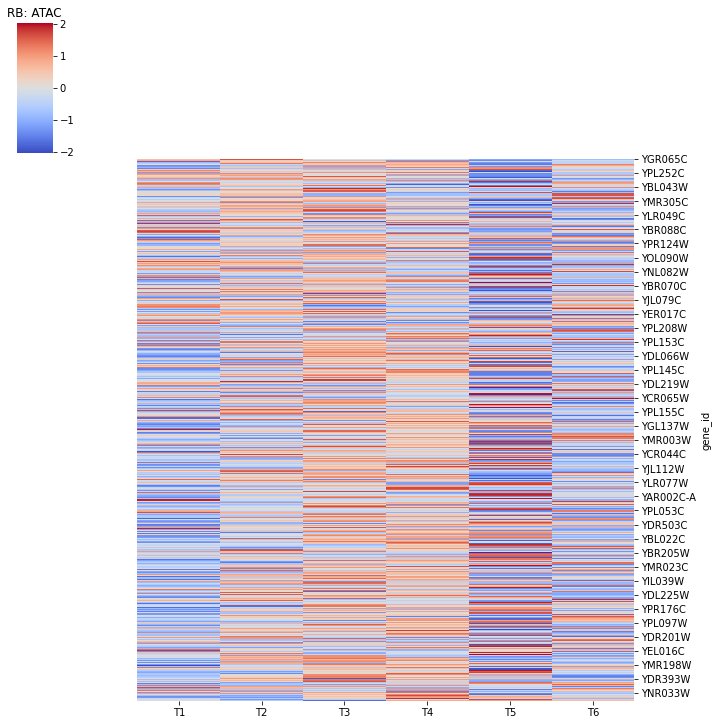

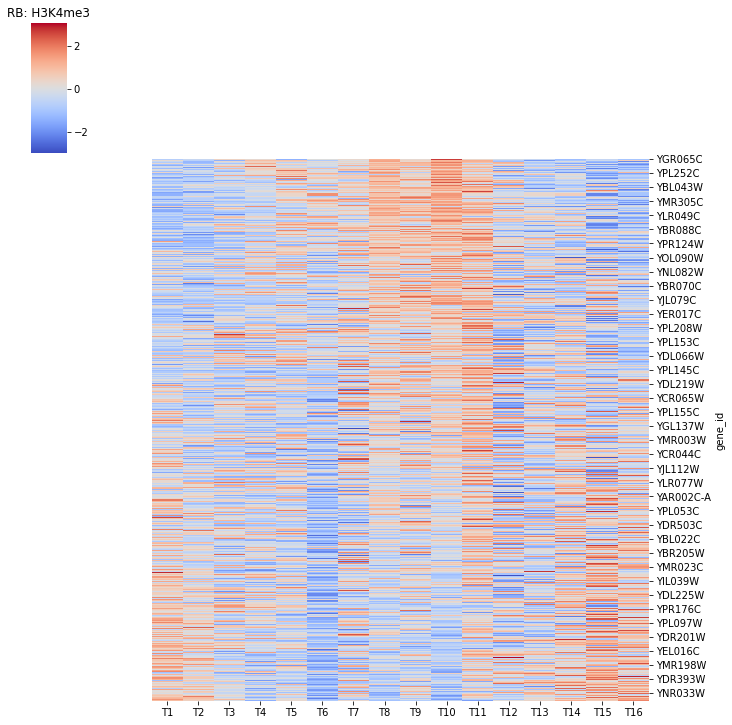

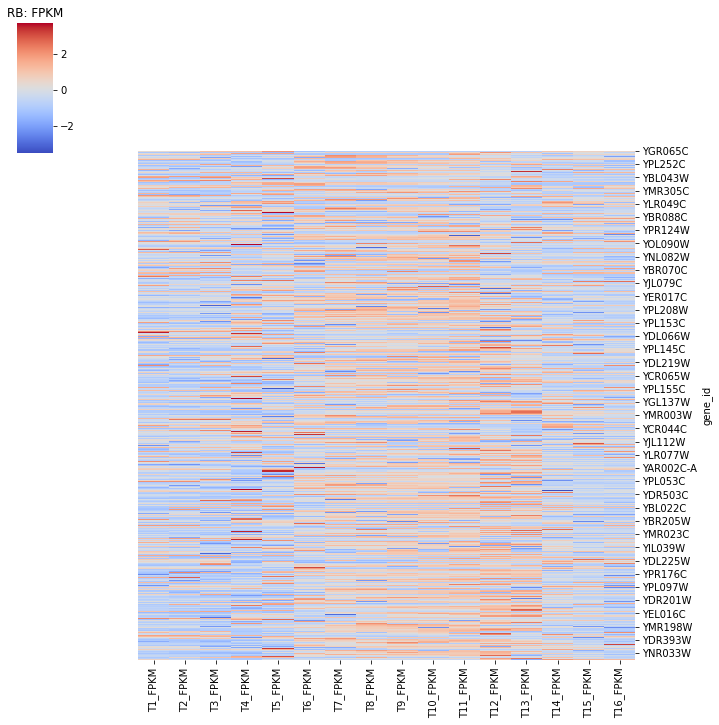

In [27]:
#H3K4me3
marcaEpigenetica= H3K4me3
perfilPrecursor= SAM_all

for etapa in ["RC","OX","RB"]:
    print(etapa)
    print("=====================================================================\n")
    genesEtapa = {"RC":lista_RC_ss,"OX":lista_OX_ss,"RB":lista_RB_ss}[etapa]
    genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

    #ATAC
    SAM_atac=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(SAM_atac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": ATAC")
    plt.savefig(etapa+"_SAM_atac.pdf")
    #H3K9Ac
    SAM_H3K4me3=H3K4me3.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(SAM_H3K4me3, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": H3K4me3")    
    plt.savefig(etapa+"_SAM_H3K4me3.pdf")
    #FPKM
    SAM_fpkm=fpkm.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(SAM_fpkm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": FPKM")
    plt.savefig(etapa+"_SAM_fpkm.pdf")

In [28]:
#Aquí cargamos los archivos resultantes con los flujos provenientes de Pheflux como diccionario
#T1= pd.read_csv("/home/bguzman/jupyter/UI/YMC/results/T_all_with_media_kuang_mod_al_rx_ac_me_dic/T1_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
folder="/home/bguzman/jupyter/UI/YMC/results/"
T1= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T1_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T2= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T2_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T3= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T3_Solve_Succeeded.csv" ,sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T4= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T4_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T5= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T5_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T6= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T6_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T7= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T7_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T8= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T8_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T9= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T9_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T10= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T10_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T11= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T11_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T12= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T12_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T13= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T13_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T14= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T14_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T15= pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T15_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T16=pd.read_csv(folder+"T_all_with_media_kuang_mod_al_rx_ac_me_enero06/T16_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)

allFluxes=pd.DataFrame()
index=0
for i in [T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16]:
    index += 1
    allFluxes["T"+str(index)]=i["flux"]/abs(i).sum(axis=0)[0]#*10000

In [29]:
allFluxes_norm=allFluxes.apply(lambda x: (x-x.mean())/x.std(), axis = 1)
allFluxes_norm.std(axis=1)

R_CITtcp           1.0
R_13BGH            1.0
R_13BGHe           1.0
R_13GS             1.0
R_16GS             1.0
                  ... 
R_AMETtn           1.0
R_HCYSMT_n         1.0
R_PMETHYL          1.0
R_EX_PME           1.0
R_EX_protein_me    1.0
Length: 1591, dtype: float64

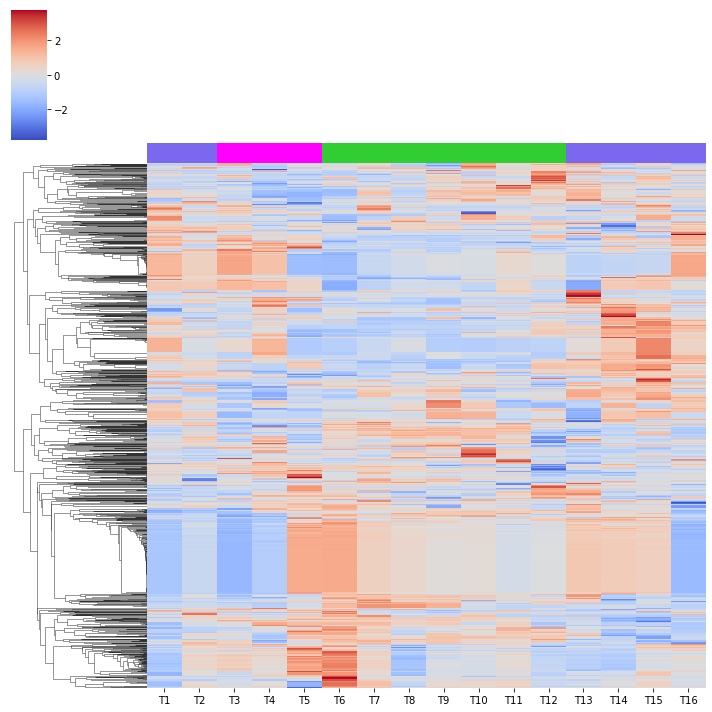

In [60]:

colColors=["mediumslateblue","mediumslateblue","magenta","magenta","magenta","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","mediumslateblue","mediumslateblue","mediumslateblue","mediumslateblue"]
allFluxes_norm=allFluxes.apply(lambda x: (x-x.mean())/x.std(), axis = 1)
allFluxes_norm=allFluxes_norm.dropna()
ax=sns.clustermap(allFluxes_norm, cmap=sns.color_palette("coolwarm", as_cmap=True),yticklabels=False,
                  col_cluster=False,col_colors=colColors,metric="euclidean")
plt.savefig("heatmapFluxes.svg")

In [34]:
high,low=1,-1

OX_ref=[low]*16
RB_ref=[low]*16
RC_ref=[low]*16

OX_RB_ref=[low]*16
RB_RC_ref=[low]*16
RC_OX_ref=[low]*16

OX_ref[2:5]=[high]*3
RB_ref[5:12]=[high]*7
RC_ref[12:17]=[high]*4
RC_ref[0:2]=[high]*2

OX_RB_ref[2:5]=[high]*3
OX_RB_ref[5:12]=[high]*7

RB_RC_ref[5:12]=[high]*7
RB_RC_ref[12:17]=[high]*4
RB_RC_ref[0:2]=[high]*2

RC_OX_ref[2:5]=[high]*3
RC_OX_ref[12:17]=[high]*4
RC_OX_ref[0:2]=[high]*2

In [35]:
len(RB_ref)

16

In [36]:
#Cálculo de la correlacion entre el precursor y la marca
def getCluster(df,references):
    # Computes the correlation
    maxCors,maxRefs=[],[]
    for i in range(len(df)):
        a = np.array(df.iloc[i,:])
        corr=[]
        for reference in references:
            b = np.array(reference)
            corr.append(stats.pearsonr(a,b)[0])
        maxCors.append( np.max(corr)    )
        maxRefs.append( np.argmax(corr) )

    return(maxCors,maxRefs)

In [37]:
references=[OX_ref,RB_ref,RC_ref]##,
#references=[OX_RB_ref,RB_RC_ref,RC_OX_ref]#[OX_ref,RB_ref,RC_ref]#,
#references=[OX_ref,RB_ref,RC_ref,OX_RB_ref,RB_RC_ref,RC_OX_ref]#[OX_ref,RB_ref,RC_ref]#,
maxCors,maxRefs=getCluster(allFluxes_norm,references)

OX (72, 16)
RB (129, 16)
RC (181, 16)


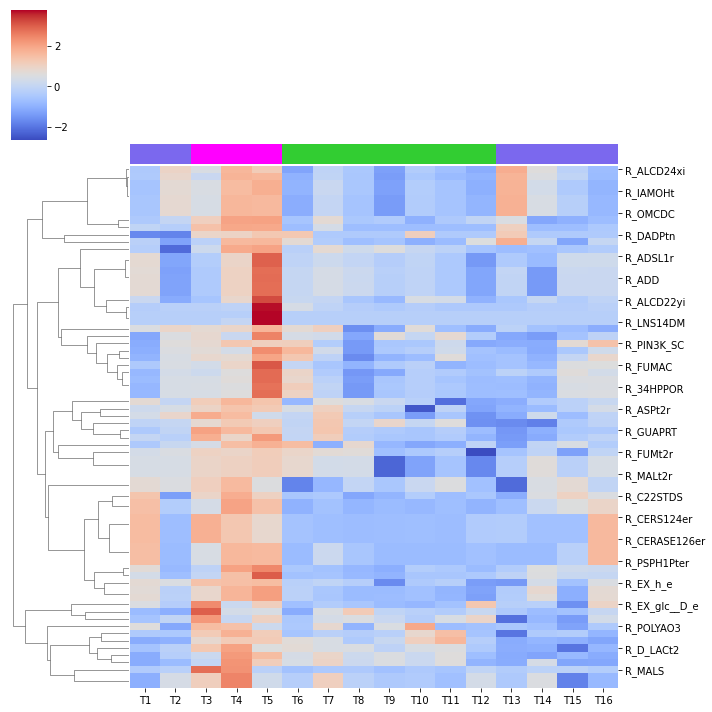

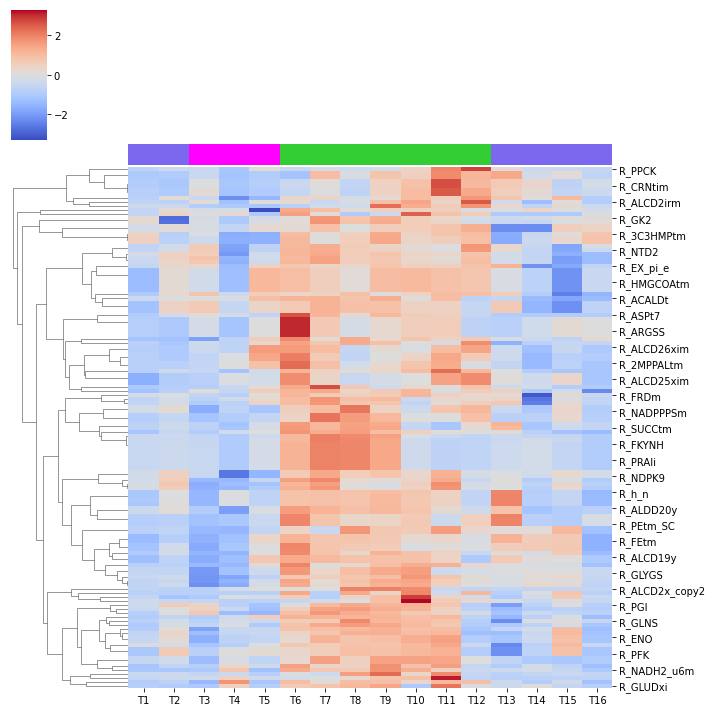

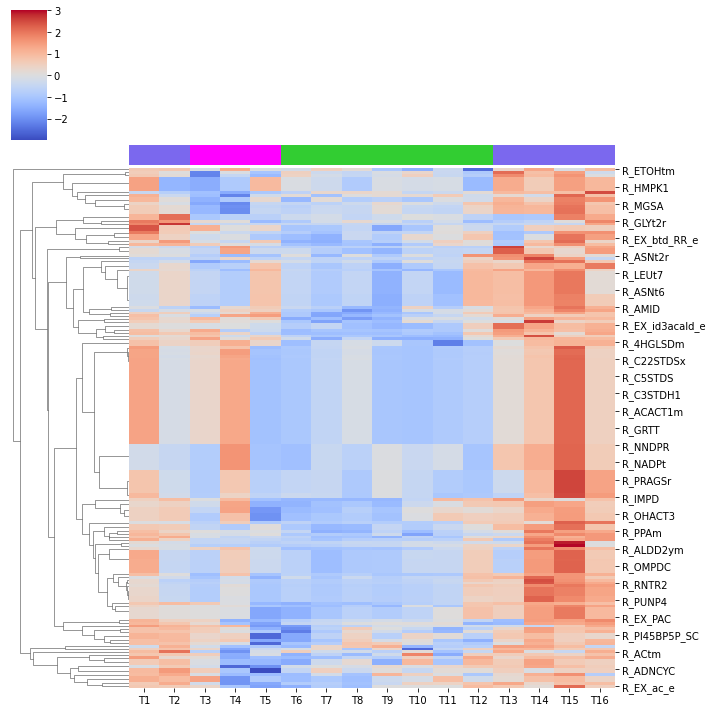

In [39]:
names = ["OX","RB","RC"]
#names = ["OX_RB","RB_RC","RC_OX"]
#names = ["OX","RB","RC","OX_RB","RB_RC","RC_OX"]
colColors=["mediumslateblue","mediumslateblue","magenta","magenta","magenta","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","mediumslateblue","mediumslateblue","mediumslateblue","mediumslateblue"]

for i in range(len(names)):
    name = names[i]
    index=( np.logical_and(np.array(maxRefs)==i,np.array(maxCors)>0.5) )
    df=allFluxes_norm.iloc[index]
    print(name,df.shape)
    ax=sns.clustermap(df, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False,col_colors=colColors,metric="correlation")

In [40]:
np.array(maxCors)<0.05

array([False, False, False, ..., False, False, False])

In [43]:
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.io import load_matlab_model, write_sbml_model
model= cobra.io.read_sbml_model("/home/bguzman/jupyter/UI/YMC/gems/iMM904.xml")


Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [1]:
#for reaction in model.reactions:
    #if "kegg.reaction" in reaction.annotation:
        #print( reaction.annotation["kegg.reaction"] )

In [2]:
#allFluxes_norm

In [68]:
allFluxes_norm.to_csv('allfluxes.csv')

In [44]:
##############################################################################
## Cargar json file y iMM904
import cobra
json_annotations = requests.get('http://bigg.ucsd.edu/static/models/iMM904.json').json()
model = cobra.io.read_sbml_model("/home/bguzman/jupyter/UI/YMC/gems/iMM904.xml")

In [45]:
##############################################################################
## extract subsystem for each reaction
subsystems_list = set()
for i in range(len(model.reactions)):
    annotation = json_annotations['reactions'][i]
    subsystems_list.add(annotation['subsystem'])

##############################################################################
## assigns the reactions to their respective subsystem
subsystems = {}
for subsyst in subsystems_list:
    subsystems[subsyst] = set()
    for i in range(len(model.reactions)):
        subsystem = json_annotations['reactions'][i]['subsystem']
        if subsyst == subsystem:
            ID = 'R_'+json_annotations['reactions'][i]['id']
            subsystems[subsyst].add(ID)

In [46]:
allFluxes_norm=allFluxes.apply(lambda x: (x-x.mean())/x.std(), axis = 1)

#Iterar por las filas del df. Si hay un NAN reemplazar por 0
allFluxes_norm=allFluxes_norm.fillna(0)


In [47]:
#allFluxes_norm

In [48]:
results=abs(allFluxes_norm)
#results

In [49]:
results.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16'],
      dtype='object')

In [51]:
#time1 = time.time()

pathways = pd.DataFrame(columns=results.columns, index=subsystems.keys())
for i, pathway in enumerate(pathways.index):
    print(pathway, "\t(",i+1,"/",len(pathways.index),")")
    for j, sample in enumerate(pathways.columns):
#         print (" - ",sample, "\t[",j+1,"/",len(pathways.columns),"]", "\t(",i+1,"/",len(pathways.index),")")
        v_path = []
        for rxn in subsystems[pathway]:
#            print(rxn)
            v = abs(results[sample].loc[rxn])
            v_path.append(v)
#       Promedio de cada ruta            
        v_mean_path = np.sum(v_path) / len(v_path)
        
        pathways[sample].loc[pathway] = v_mean_path
        
#         break
        
        
#     break

#time2 = time.time()
#print("Time:", (time2-time1)/60, "min")

S_Purine_and_Pyrimidine_Biosynthesis 	( 1 / 60 )
S_Nitrogen_Metabolism 	( 2 / 60 )
Extracellular exchange 	( 3 / 60 )
S_Tyrosine__Tryptophan__and_Phenylalanine_Metabolism 	( 4 / 60 )
S_Folate_Metabolism 	( 5 / 60 )
S_Arginine_and_Proline_Metabolism 	( 6 / 60 )
S_Transport__Golgi_Apparatus 	( 7 / 60 )
S_Phospholipid_Metabolism 	( 8 / 60 )
S_Alternate_Carbon_Metabolism 	( 9 / 60 )
S_Starch_and_Sucrose_Metabolism 	( 10 / 60 )
S_Pantothenate_and_CoA_Biosynthesis 	( 11 / 60 )
S_NAD_Biosynthesis 	( 12 / 60 )
S_Cysteine_Metabolism 	( 13 / 60 )
S_Alanine_and_Aspartate_Metabolism 	( 14 / 60 )
S_Porphyrin_and_Chlorophyll_Metabolism 	( 15 / 60 )
S_Glutamine_Metabolism 	( 16 / 60 )
S_Anaplerotic_reactions 	( 17 / 60 )
S_Valine__Leucine__and_Isoleucine_Metabolism 	( 18 / 60 )
S_Glycerolipid_Metabolism 	( 19 / 60 )
S_Galactose_metabolism 	( 20 / 60 )
S_Anaplerotic_Reactions 	( 21 / 60 )
S_Xylose_Metabolism 	( 22 / 60 )
S_Histidine_Metabolism 	( 23 / 60 )
Biomass and maintenance functions 	( 24 / 60 

In [52]:
pathways

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16
S_Purine_and_Pyrimidine_Biosynthesis,0.723362,0.578935,0.547473,0.751524,0.748499,0.532616,0.690797,0.551593,0.541946,0.422556,0.50518,0.673909,0.747726,0.869706,1.369712,0.861411
S_Nitrogen_Metabolism,0.387052,0.44486,1.219625,0.258969,0.261148,0.429001,0.119568,0.364502,0.34902,0.35524,0.245169,0.301309,0.466361,0.214534,0.192104,1.824225
Extracellular exchange,0.49308,0.329152,0.557166,0.58809,0.670891,0.635384,0.424691,0.352703,0.432184,0.455285,0.323358,0.529791,0.561457,0.562877,0.634147,0.520162
S_Tyrosine__Tryptophan__and_Phenylalanine_Metabolism,1.043738,0.443901,0.607804,0.881096,1.022113,0.733186,0.678865,0.702873,0.884842,0.429605,0.573119,0.54951,0.588812,0.947946,0.912786,0.599603
S_Folate_Metabolism,0.732312,0.42565,0.946274,0.583932,0.78057,0.600069,0.450383,0.426142,0.477407,0.575022,0.442101,0.500452,0.869256,0.591284,0.602629,0.820243
S_Arginine_and_Proline_Metabolism,0.64692,0.530104,0.686002,0.788009,0.584928,1.039506,0.602575,0.646719,0.393228,0.667077,0.620526,0.800985,0.822753,0.557079,0.655976,0.511367
S_Transport__Golgi_Apparatus,1.476334,0.303086,0.648048,0.419944,1.814128,2.173582,0.845125,0.646705,0.267838,0.223802,0.399095,0.524999,0.388695,0.356222,0.669633,0.654754
S_Phospholipid_Metabolism,0.962013,0.839998,0.930196,0.649658,0.565816,0.827537,1.159571,0.372713,0.423612,0.348734,0.270531,0.106875,1.703572,1.257114,0.913606,0.873514
S_Alternate_Carbon_Metabolism,0.770772,0.466509,1.21996,1.072489,0.810142,0.923687,0.652807,0.504014,0.617831,0.657739,0.549953,0.556503,1.019654,0.720686,1.019248,0.897346
S_Starch_and_Sucrose_Metabolism,1.147654,0.327909,1.498074,0.913159,0.954492,1.427576,0.394693,0.601871,0.428498,0.592727,0.128234,0.190085,0.87534,0.465876,1.188395,1.624782


In [53]:
pathways.iloc[1,0:]

T1     0.387052
T2      0.44486
T3     1.219625
T4     0.258969
T5     0.261148
T6     0.429001
T7     0.119568
T8     0.364502
T9      0.34902
T10     0.35524
T11    0.245169
T12    0.301309
T13    0.466361
T14    0.214534
T15    0.192104
T16    1.824225
Name: S_Nitrogen_Metabolism, dtype: object

In [54]:
#Sacar promedio entre los diferentes elementos de los tiempos involucrados en RC
reactions=list(pathways.index)
mean_RC=list((pathways["T1"] + pathways["T2"] + pathways["T13"] + pathways["T14"] + pathways["T15"] + pathways["T16"])/6)
mean_OX=list((pathways["T3"] + pathways["T4"] + pathways["T5"])/3)
mean_RB=list((pathways["T6"] + pathways["T7"] + pathways["T8"] + pathways["T9"] + pathways["T10"] + pathways["T11"] + pathways["T12"])/7)
etapas= pd.DataFrame(list(zip(reactions,mean_RC,mean_OX,mean_RB)), columns = ['Reactions','RC flux','OX flux','RB flux'])
etapas

,Reactions,RC flux,OX flux,RB flux
0,S_Purine_and_Pyrimidine_Biosynthesis,0.858475,0.682499,0.559800
1,S_Nitrogen_Metabolism,0.588189,0.579914,0.309115
2,Extracellular exchange,0.516812,0.605383,0.450485
3,S_Tyrosine__Tryptophan__and_Phenylalanine_Meta...,0.756131,0.837005,0.650286
4,S_Folate_Metabolism,0.673562,0.770258,0.495939
5,S_Arginine_and_Proline_Metabolism,0.620700,0.686313,0.681517
6,S_Transport__Golgi_Apparatus,0.641454,0.960706,0.725878
7,S_Phospholipid_Metabolism,1.091636,0.715223,0.501368
8,S_Alternate_Carbon_Metabolism,0.815703,1.034197,0.637505
9,S_Starch_and_Sucrose_Metabolism,0.938326,1.121908,0.537669


In [55]:
GG=[]
OXP=[]
PM=[]
GM=[]
AAM=[]
FAB=[]
TCA=[]
TM=[]
NAD=[]
PP=[]

list_path=["GG","OXP","PM","AAM","GM","FAB","TCA","NAD","PP","TM"]

i=0
j=0
for i in range(len(pathways)):
    for j in pathways.index:
        if j=="S_GlycolysisGluconeogenesis":
            GG.append(list(pathways.iloc[i,0:]))
        elif j=="S_Oxidative_Phosphorylation":
            OXP.append(list(pathways.iloc[i,0:]))
        elif j=="S_Pyruvate_Metabolism":
            PM.append(list(pathways.iloc[i,0:]))
        elif j=="S_Alanine_and_Aspartate_Metabolism":
            AAM.append(list(pathways.iloc[i,0:]))
        elif j=="S_Glutamate_metabolism":
            GM.append(list(pathways.iloc[i,0:]))
        elif j=="S_Fatty_Acid__Biosynthesis":
            FAB.append(list(pathways.iloc[i,0:]))
        elif j=="S_Citric_Acid_Cycle":
            TCA.append(list(pathways.iloc[i,0:]))
        elif j=="S_NAD_Biosynthesis":
            NAD.append(list(pathways.iloc[i,0:]))
        elif j=="S_Pentose_Phosphate_Pathway":
            PP.append(list(pathways.iloc[i,0:]))
        elif j=="S_Transport__Mitochondrial":
            TM.append(list(pathways.iloc[i,0:]))
        else:
            print("Loading")
        i+=1
            
    break


Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading


In [129]:
GG

[[0.6959186516975087,
  0.5108102476918177,
  0.8907957763239795,
  0.7156493071928641,
  0.798819396103692,
  0.6317948451546923,
  0.8577859951869414,
  0.8980442788541403,
  0.9205334858546,
  0.9236875175846797,
  0.8092878439663924,
  0.7478469847076447,
  1.1253756351387012,
  0.5568882216731575,
  0.8317977010577461,
  1.0235340364654786]]

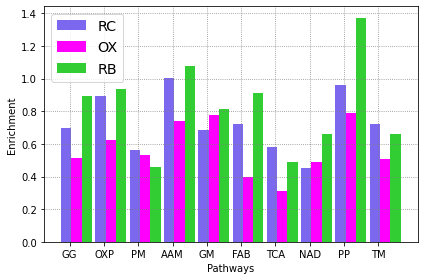

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

RC_means = [GG[0][0], OXP[0][0], PM[0][0], AAM[0][0], GM[0][0], FAB[0][0], TCA[0][0], NAD[0][0], PP[0][0], TM[0][0]]
OX_means = [GG[0][1], OXP[0][1], PM[0][1], AAM[0][1], GM[0][1], FAB[0][1], TCA[0][1], NAD[0][1], PP[0][1], TM[0][1]]
RB_means = [GG[0][2], OXP[0][2], PM[0][2], AAM[0][2], GM[0][2], FAB[0][2], TCA[0][2], NAD[0][2], PP[0][2], TM[0][2]]

x = np.arange(len(list_path))
#tamaño de cada barra
width = 0.30

fig, ax = plt.subplots()

#Generamos las barras para el conjunto1
rects1 = ax.bar(x - width/3, RC_means, width, label='RC',color='mediumslateblue')
#Generamos las barras para el conjunto3
rects2 = ax.bar(x + 0.2, OX_means, width, label='OX',color='magenta')
#Generamos las barras para el conjunto3
rects3 = ax.bar(x + 0.5, RB_means, width, label='RB',color='limegreen')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Enrichment')
ax.set_xlabel('Pathways')
#ax.set_title('Yeast Metabolic Cycle')
ax.set_xticks(x)
ax.set_xticklabels(list_path)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

        
#Añadimos las etiquetas para cada barra
plt.legend(fontsize="x-large")
fig.tight_layout()
plt.grid(color='grey',linestyle='dotted')
plt.savefig('pathways.pdf')
#Mostramos la grafica con el metodo show()
#plt.show()
        